## Analisis de Temporadas de las principales ligas europeas

Se tiene una base de datos sql, donde se tienen tablas con información sobre las temporadas de las ligas europeas desde el 2009 al 2016. Los datos fueron descargados de la pagina https://www.kaggle.com/datasets/hugomathien/soccer

### Configuración Inicial

In [69]:
#Librerias generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [70]:
#Visualizar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)
#Ignorar los warnings
import warnings
warnings.filterwarnings("ignore")

### Carga de Datos

Para la lectura de datos desde sql, se usa la libreria sqlalchemy para su carga en python.

In [71]:
#Lectura de datos sql
from sqlalchemy import create_engine
from sqlalchemy import inspect
#Pasos la lectura de la BD
engine = create_engine('sqlite:///C:\DataSets\Kaggle\Ligas Europeas\database.sqlite') #engine database

In [72]:
#Mostrar las tablas que existen dentro de la base de datos
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print("schema: %s" % schema)
    for table_name in inspector.get_table_names(schema=schema):
        print(table_name)

schema: main
Country
League
Match
Player
Player_Attributes
Team
Team_Attributes
sqlite_sequence


In [73]:
#Carga de Datos
df_country = pd.read_sql_query('SELECT * FROM Country',engine)
df_league = pd.read_sql_query('SELECT * FROM League',engine)
df_match = pd.read_sql_query('SELECT * FROM Match',engine)
df_player = pd.read_sql_query('SELECT * FROM Player',engine)
df_player_attributes = pd.read_sql_query('SELECT * FROM Player_Attributes',engine)
df_team = pd.read_sql_query('SELECT * FROM Team',engine)
df_team_attributes = pd.read_sql_query('SELECT * FROM Team_Attributes',engine)

In [74]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [75]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


### Revision preliminar de datos

In [76]:
df_match_new = df_match.drop([ 'home_player_X1','home_player_X2', 'home_player_X3', 'home_player_X4','home_player_X5', 'home_player_X6', 'home_player_X7','home_player_X8', 'home_player_X9', 'home_player_X10','home_player_X11', 'away_player_X1', 'away_player_X2','away_player_X3', 'away_player_X4', 'away_player_X5','away_player_X6', 'away_player_X7', 'away_player_X8','away_player_X9', 'away_player_X10', 'away_player_X11','home_player_Y1', 'home_player_Y2', 'home_player_Y3','home_player_Y4', 'home_player_Y5', 'home_player_Y6','home_player_Y7', 'home_player_Y8', 'home_player_Y9','home_player_Y10', 'home_player_Y11', 'away_player_Y1','away_player_Y2', 'away_player_Y3', 'away_player_Y4','away_player_Y5', 'away_player_Y6', 'away_player_Y7','away_player_Y8', 'away_player_Y9', 'away_player_Y10','away_player_Y11','B365H','B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH','LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH','SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH','BSD', 'BSA'],axis=1)

In [77]:
df_match_new.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None


In [78]:
df_match.columns.ravel()

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [79]:
df_player.head(3)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163


In [80]:
df_player_attributes.head(4)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [81]:
df_team.head(4)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK


In [82]:
df_team_attributes.head(5)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Verificacion de los valores nulos dentro del dataset

In [83]:
df_match_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null  int64  
 10  away_team_goal    25979 non-null  int64  
 11  home_player_1     24755 non-null  float64
 12  home_player_2     24664 non-null  float64
 13  home_player_3     24698 non-null  float64
 14  home_player_4     24656 non-null  float64
 15  home_player_5     24663 non-null  float64
 16  home_player_6     24654 non-null  float6

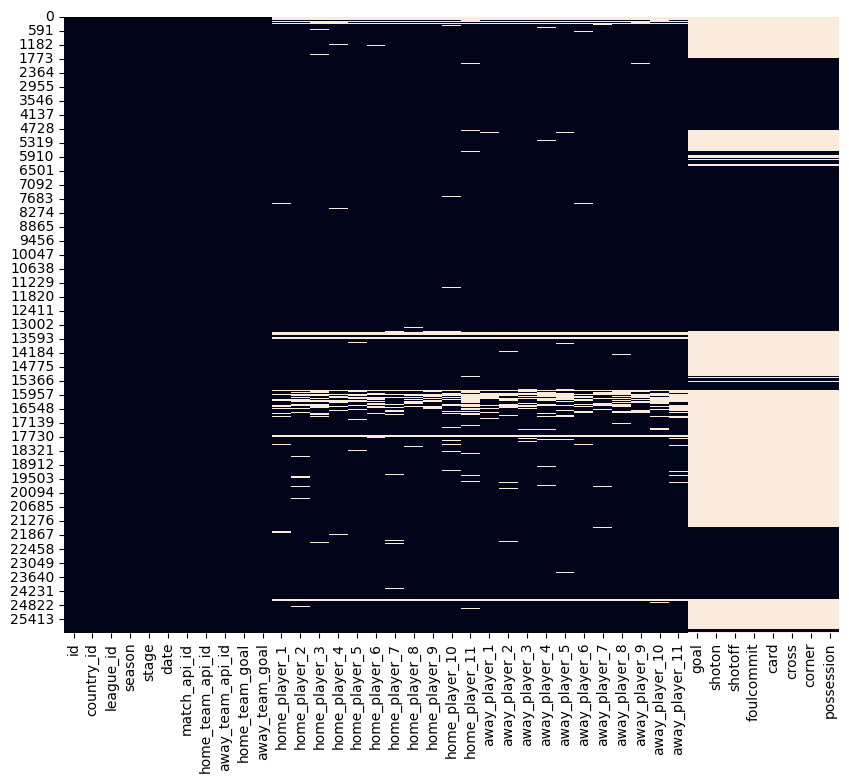

In [84]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_match_new.isnull(),cbar=False)
plt.show()

### Relaciones entre tablas - EDA Ligas Jugadas

Como la base de datos es relacional, se requiren hacer uniones entre las tablas para condensar la información para analisis posteriores. Data_Master viene a ser la union entre la data de los partidos (df_match) con los de los equipos (df_teams) y las ligas (df_leagues)

In [85]:
#Join entre data de partidos y la de las ligas
data_master = pd.merge(df_match_new,df_league,left_on='country_id',right_on='id',how='left') 

In [86]:
#Join entre data de partidos y datos de los equipos
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='home_team_api_id',right_on='team_api_id',how='left') #Equipos en partios de local
data_master.rename({'team_long_name':'home_team'},axis=1,inplace=True)
data_master = pd.merge(data_master,df_team[['team_api_id','team_long_name']],left_on='away_team_api_id',right_on='team_api_id',how='left') #Equipos en partidos de visita
data_master.rename({'team_long_name':'away_team'},axis=1,inplace=True)
data_master.rename({'name':'league'},axis=1,inplace=True) 
data_master.drop(['id_y','country_id_y','team_api_id_x','team_api_id_y'],axis=1,inplace=True)

In [87]:
data_master.head(8)

,id_x,country_id_x,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league,home_team,away_team
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KRC Genk,Beerschot AC
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,FCV Dender EH,Standard de Liège
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KV Mechelen,Club Brugge KV
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,KSV Roeselare,KV Kortrijk
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,Belgium Jupiler League,Tubize,Royal Excel Mouscron


### Analisis de datos de las temporadas por liga

Al tener la bd final de los equipos y resultados, se proceder a transformar los datos para visualizar los ganadores de cada temporada y liga

In [88]:
#Se extraen las columnas que son de interes para determinar los clubes ganadores de cada temporada
data_season = data_master[['season','date','match_api_id','home_team_goal','away_team_goal','league','home_team','away_team','stage']]

In [89]:
l = [int(x[-4:]) for x in data_season['season']]
data_season['year'] = l

In [90]:
data_season.head()

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,stage,year
0,2008/2009,2008-08-17 00:00:00,492473,1,1,Belgium Jupiler League,KRC Genk,Beerschot AC,1,2009
1,2008/2009,2008-08-16 00:00:00,492474,0,0,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,1,2009
2,2008/2009,2008-08-16 00:00:00,492475,0,3,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,1,2009
3,2008/2009,2008-08-17 00:00:00,492476,5,0,Belgium Jupiler League,KAA Gent,RAEC Mons,1,2009
4,2008/2009,2008-08-16 00:00:00,492477,1,3,Belgium Jupiler League,FCV Dender EH,Standard de Liège,1,2009


Para determinar los ganadores de cada temporada,se realiza un calculo para definir los puntos obtenidos en cada partido

In [91]:
#Clasificar los puntos por partido ganado
#Para local
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'home_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'home_result'] = 1
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'home_result'] = 0

In [92]:
#Para visita
data_season.loc[(data_season['home_team_goal']<data_season['away_team_goal']),'away_result'] = 3
data_season.loc[(data_season['home_team_goal']==data_season['away_team_goal']),'away_result'] = 1
data_season.loc[(data_season['home_team_goal']>data_season['away_team_goal']),'away_result'] = 0

In [93]:
#Diferencia de goles
data_season['h_goaldiff'] = data_season['home_team_goal']-data_season['away_team_goal']
data_season['a_goaldiff'] = data_season['away_team_goal']-data_season['home_team_goal']

In [94]:
data_season[(data_season['year']==2015)&(data_season['league']=='Spain LIGA BBVA')]

,season,date,match_api_id,home_team_goal,away_team_goal,league,home_team,away_team,stage,year,home_result,away_result,h_goaldiff,a_goaldiff
23797,2014/2015,2014-08-23 00:00:00,1778034,1,1,Spain LIGA BBVA,Sevilla FC,Valencia CF,1,2015,1.0,1.0,0,0
23798,2014/2015,2014-08-24 00:00:00,1778035,0,2,Spain LIGA BBVA,Levante UD,Villarreal CF,1,2015,0.0,3.0,-2,2
23799,2014/2015,2014-08-25 00:00:00,1778036,0,0,Spain LIGA BBVA,Rayo Vallecano,Atlético Madrid,1,2015,1.0,1.0,0,0
23800,2014/2015,2014-08-23 00:00:00,1778037,1,0,Spain LIGA BBVA,Málaga CF,Athletic Club de Bilbao,1,2015,3.0,0.0,1,-1
23801,2014/2015,2014-08-24 00:00:00,1778038,3,1,Spain LIGA BBVA,RC Celta de Vigo,Getafe CF,1,2015,3.0,0.0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24172,2014/2015,2014-10-25 00:00:00,1778119,0,1,Spain LIGA BBVA,UD Almería,Athletic Club de Bilbao,9,2015,0.0,3.0,-1,1
24173,2014/2015,2014-10-24 00:00:00,1778120,3,0,Spain LIGA BBVA,RC Celta de Vigo,Levante UD,9,2015,3.0,0.0,3,-3
24174,2014/2015,2014-10-25 00:00:00,1778121,3,1,Spain LIGA BBVA,Real Madrid CF,FC Barcelona,9,2015,3.0,0.0,2,-2
24175,2014/2015,2014-10-25 00:00:00,1778122,1,1,Spain LIGA BBVA,SD Eibar,Granada CF,9,2015,1.0,1.0,0,0


Creación de dos tablas con los puntos obtenidos de visita y como local y se concatenan par tener el formato tabular

In [95]:
#Datos de local
data_home= data_season[['year','date','league','home_team','home_result','h_goaldiff','stage','match_api_id']]
data_home.rename({'home_team':'team','home_result':'points','h_goaldiff':'goals'},axis=1,inplace=True)
data_home['location'] = 'home'

In [96]:
#Datos de visita
data_away= data_season[['year','date','league','away_team','away_result','a_goaldiff','stage','match_api_id']]
data_away.rename({'away_team':'team','away_result':'points','a_goaldiff':'goals'},axis=1,inplace=True)
data_away['location'] = 'away'

In [97]:
data_final_season = data_home.append(data_away) #Concatenación

In [98]:
data_final_season

,year,date,league,team,points,goals,stage,match_api_id,location
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,KRC Genk,1.0,0,1,492473,home
1,2009,2008-08-16 00:00:00,Belgium Jupiler League,SV Zulte-Waregem,1.0,0,1,492474,home
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,KSV Cercle Brugge,0.0,-3,1,492475,home
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,1,492476,home
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,FCV Dender EH,0.0,-2,1,492477,home
...,...,...,...,...,...,...,...,...,...
25974,2016,2015-09-22 00:00:00,Switzerland Super League,FC Thun,0.0,-1,9,1992091,away
25975,2016,2015-09-23 00:00:00,Switzerland Super League,FC Luzern,3.0,1,9,1992092,away
25976,2016,2015-09-23 00:00:00,Switzerland Super League,FC Sion,0.0,-2,9,1992093,away
25977,2016,2015-09-22 00:00:00,Switzerland Super League,FC Zürich,1.0,0,9,1992094,away


En base a lo anterior, se agrupan los datos para obtener sus puntos totales por temporada y liga

In [99]:
data_result = data_final_season.groupby(['year','league','team'])['points','goals'].sum()

In [100]:
data_result = data_result.sort_values(['year','league','points','goals'],ascending=False)

In [101]:
data_result = data_result.reset_index()

In [102]:
data_result.head()

,year,league,team,points,goals
0,2016,Switzerland Super League,FC Basel,83.0,50
1,2016,Switzerland Super League,BSC Young Boys,69.0,31
2,2016,Switzerland Super League,FC Luzern,54.0,9
3,2016,Switzerland Super League,Grasshopper Club Zürich,53.0,9
4,2016,Switzerland Super League,FC Sion,50.0,3


In [103]:
#Ejempo de la liga española en el 2015
data_result[(data_result['year']==2015)&(data_result['league']=='Spain LIGA BBVA')]

,year,league,team,points,goals
198,2015,Spain LIGA BBVA,FC Barcelona,94.0,89
199,2015,Spain LIGA BBVA,Real Madrid CF,92.0,80
200,2015,Spain LIGA BBVA,Atlético Madrid,78.0,38
201,2015,Spain LIGA BBVA,Valencia CF,77.0,38
202,2015,Spain LIGA BBVA,Sevilla FC,76.0,26
203,2015,Spain LIGA BBVA,Villarreal CF,60.0,11
204,2015,Spain LIGA BBVA,Athletic Club de Bilbao,55.0,1
205,2015,Spain LIGA BBVA,RC Celta de Vigo,51.0,3
206,2015,Spain LIGA BBVA,Málaga CF,50.0,-6
207,2015,Spain LIGA BBVA,RCD Espanyol,49.0,-4


In [104]:
#Datos de años y ligas
year = data_result['year'].unique()
year = year.tolist()
leagues = data_result['league'].unique()
leagues =  leagues.tolist()

In [105]:
#Creación del dataframe de equipos ganadores por liga
df_win = pd.DataFrame({
    'year':[],
    'league':[],
    'team':[],
    'points':[],
    'goals':[]
})

In [106]:
for i in year:
    for j in leagues:
        df_win = pd.concat([df_win,data_result[(data_result['year']==i)&(data_result['league']==j)].iloc[0:1,:]])

In [107]:
df_win

,year,league,team,points,goals
0,2016.0,Switzerland Super League,FC Basel,83.0,50.0
10,2016.0,Spain LIGA BBVA,FC Barcelona,91.0,83.0
30,2016.0,Scotland Premier League,Celtic,86.0,62.0
42,2016.0,Portugal Liga ZON Sagres,SL Benfica,88.0,66.0
60,2016.0,Poland Ekstraklasa,Legia Warszawa,60.0,30.0
...,...,...,...,...,...
1382,2009.0,Italy Serie A,Inter,84.0,38.0
1402,2009.0,Germany 1. Bundesliga,VfL Wolfsburg,69.0,39.0
1420,2009.0,France Ligue 1,Girondins de Bordeaux,80.0,30.0
1440,2009.0,England Premier League,Manchester United,90.0,44.0


<Axes: xlabel='count', ylabel='team'>

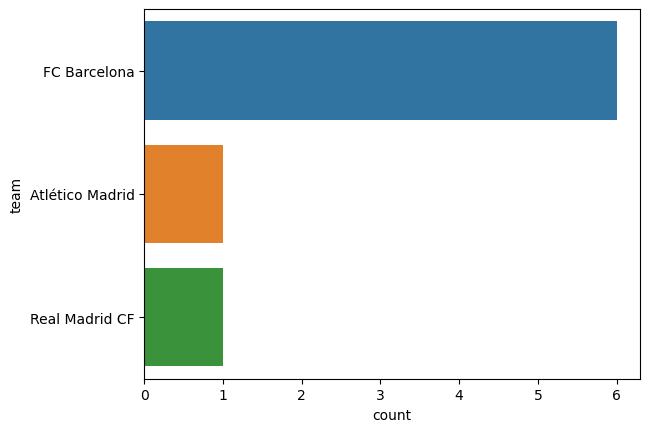

In [108]:
#Ejemplo liga española
sns.countplot(y=df_win['team'][df_win['league']=='Spain LIGA BBVA'])

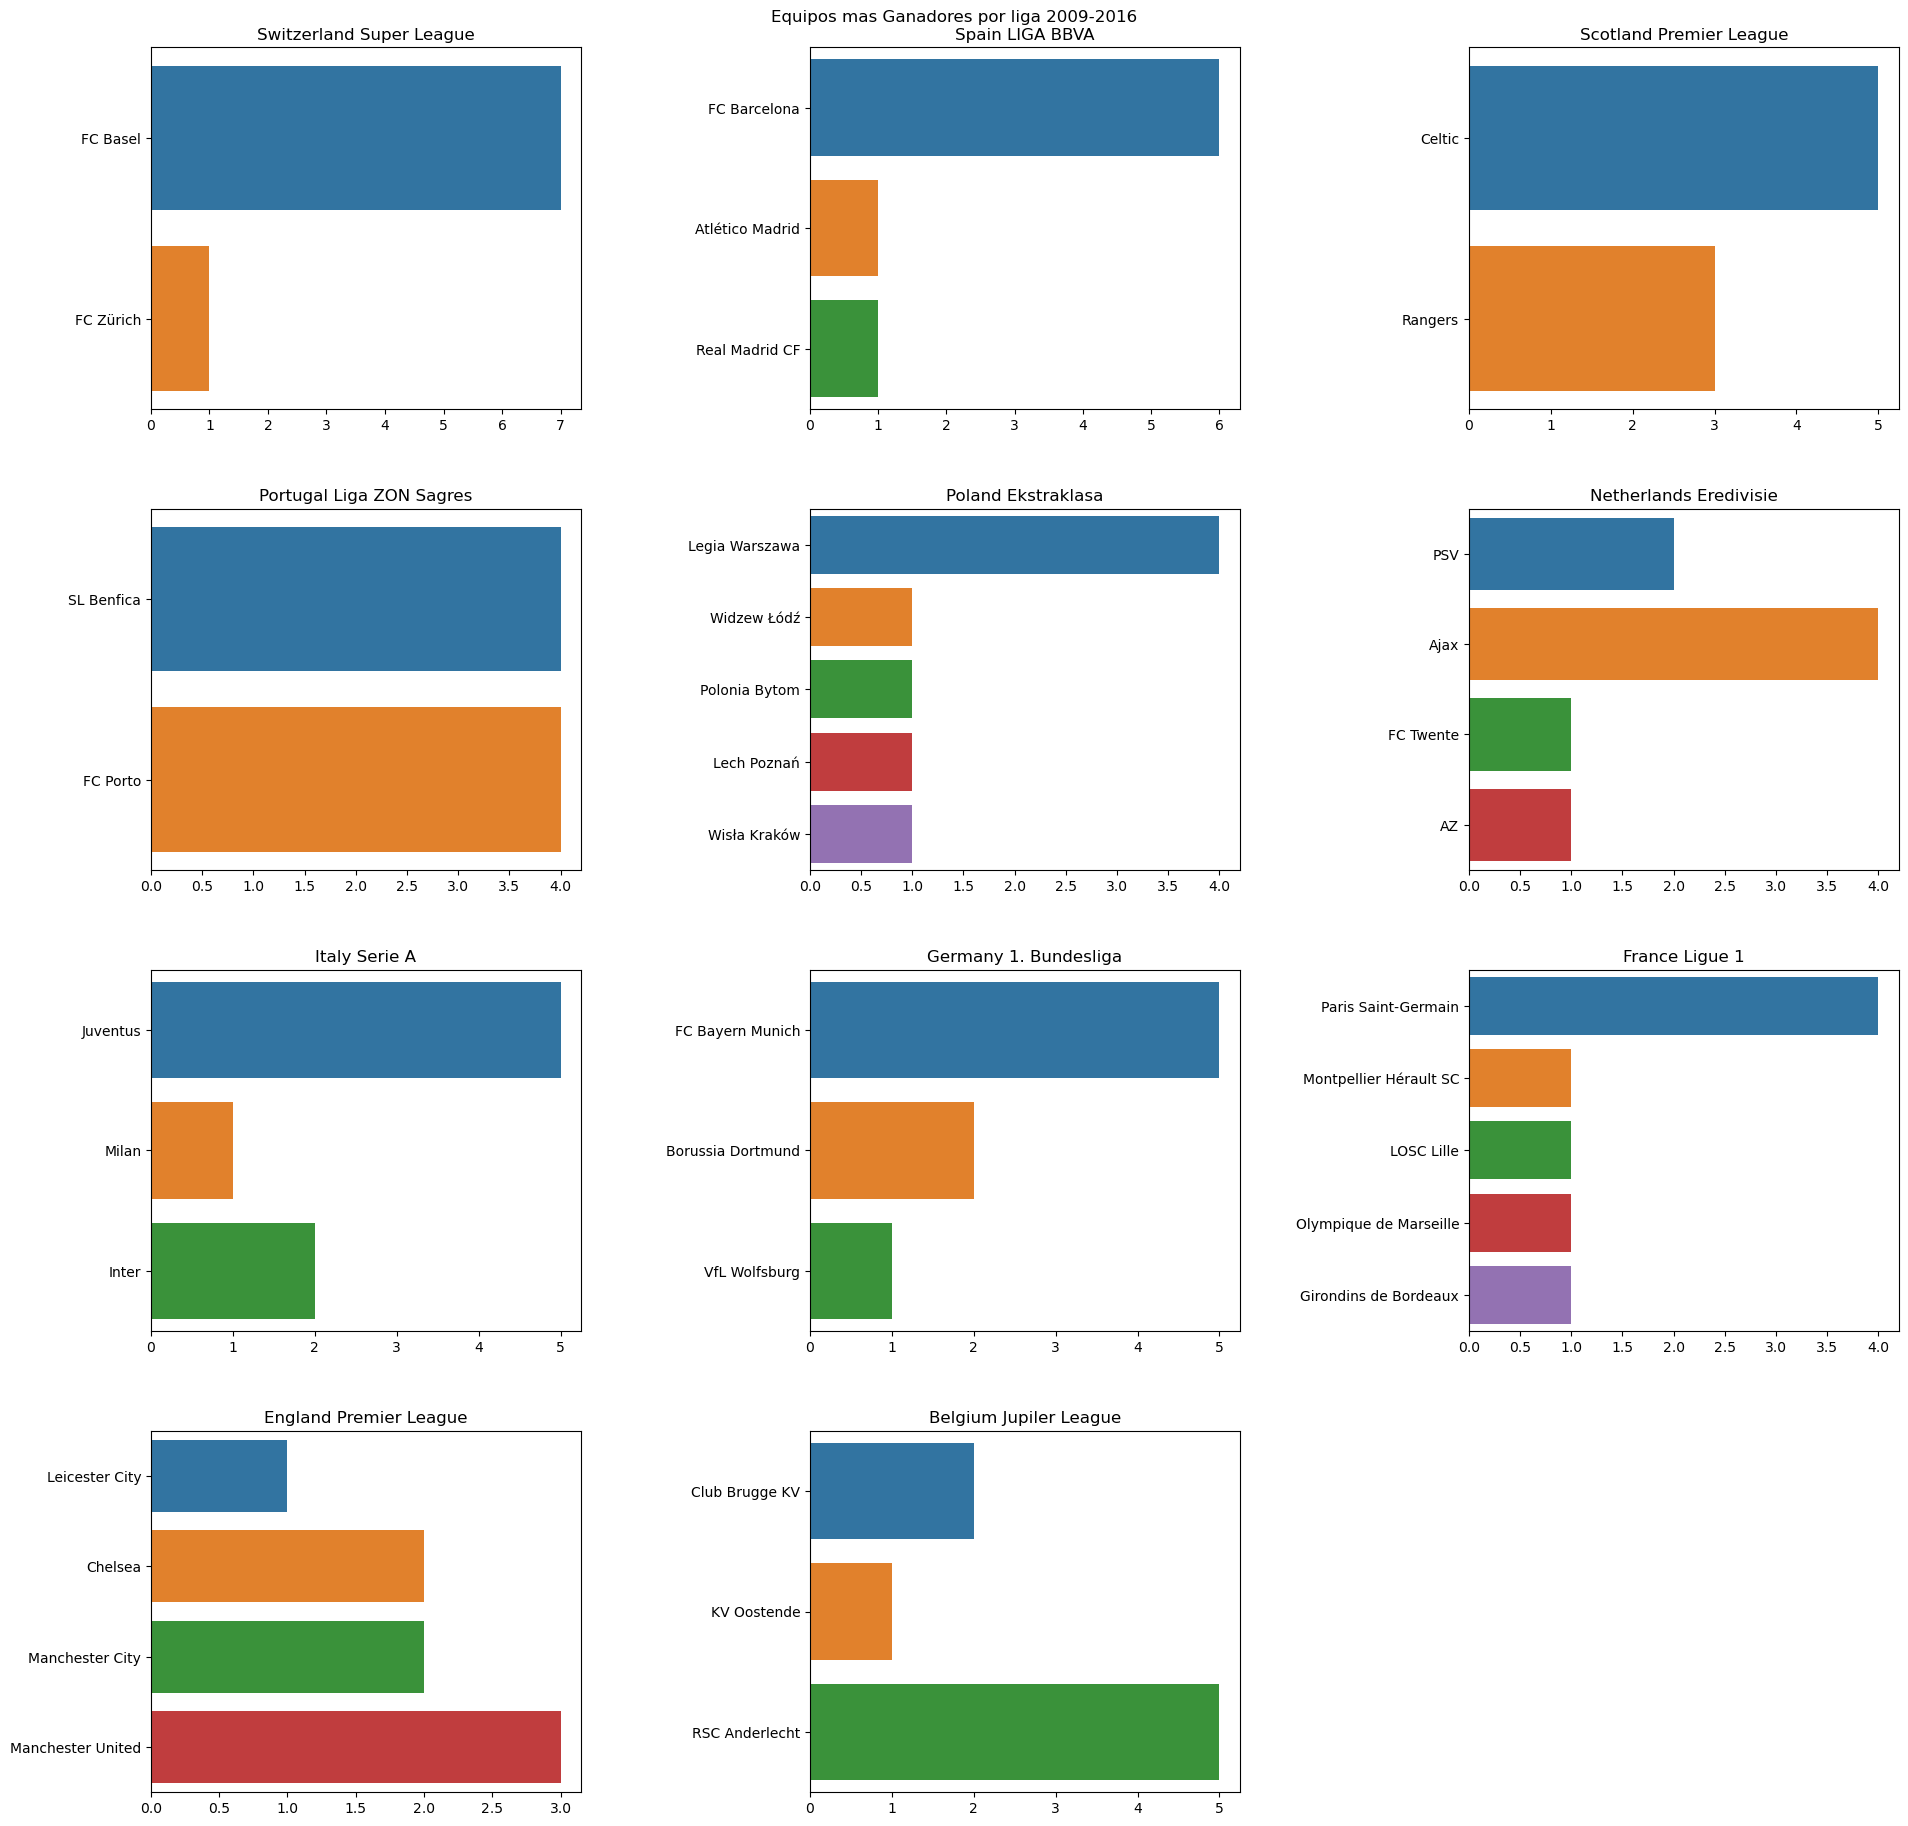

In [109]:
fig = plt.figure(figsize=(20,19))
for i in range(len(leagues)):
    ax = plt.subplot(4,3,i+1)
    sns.countplot(y=df_win['team'][df_win['league']==leagues[i]],ax=ax)
    ax.set(xlabel=None,ylabel=None)
    ax.set_title(leagues[i])
fig.tight_layout(pad=4.0)
fig.suptitle('Equipos mas Ganadores por liga 2009-2016')
plt.show()

### Ventaja del campeon de liga

In [110]:
pd.pivot_table(data=data_final_season,values='points',index=['league','year','team'],columns='stage',aggfunc=lambda x: np.cumsum(x,axis=0))

stage                                                   1    2    3    4   \
league                   year team                                          
Belgium Jupiler League   2009 Beerschot AC             1.0  1.0  0.0  3.0   
                              Club Brugge KV           1.0  3.0  3.0  1.0   
                              FCV Dender EH            0.0  1.0  0.0  1.0   
                              KAA Gent                 3.0  1.0  3.0  0.0   
                              KRC Genk                 1.0  0.0  3.0  3.0   
...                                                    ...  ...  ...  ...   
Switzerland Super League 2016 FC Thun                  0.0  3.0  0.0  0.0   
                              FC Vaduz                 0.0  1.0  0.0  1.0   
                              FC Zürich                1.0  1.0  0.0  3.0   
                              Grasshopper Club Zürich  3.0  0.0  3.0  3.0   
                              Lugano                   0.0  0.0  3.0  0.0   

stage                                                   5    6    7    8   \
league                   year team                                          
Belgium Jupiler League   2009 Beerschot AC             0.0  1.0  1.0  0.0   
                              Club Brugge KV           3.0  3.0  3.0  3.0   
                              FCV Dender EH            3.0  0.0  0.0  0.0   
                              KAA Gent                 0.0  1.0  1.0  3.0   
                              KRC Genk                 0.0  3.0  3.0  3.0   
...                                                    ...  ...  ...  ...   
Switzerland Super League 2016 FC Thun                  0.0  3.0  0.0  1.0   
                              FC Vaduz                 1.0  0.0  3.0  0.0   
                              FC Zürich                0.0  0.0  0.0  1.0   
                              Grasshopper Club Zürich  1.0  3.0  3.0  1.0   
                              Lugano                   3.0  0.0  0.0  0.0   

stage                                                   9    10   11   12  \
league                   year team                                          
Belgium Jupiler League   2009 Beerschot AC             1.0  0.0  0.0  1.0   
                              Club Brugge KV           0.0  3.0  1.0  1.0   
                              FCV Dender EH            3.0  1.0  1.0  3.0   
                              KAA Gent                 3.0  3.0  1.0  0.0   
                              KRC Genk                 1.0  3.0  0.0  1.0   
...                                                    ...  ...  ...  ...   
Switzerland Super League 2016 FC Thun                  0.0  0.0  1.0  3.0   
                              FC Vaduz                 0.0  3.0  1.0  1.0   
                              FC Zürich                1.0  0.0  1.0  0.0   
                              Grasshopper Club Zürich  3.0  1.0  0.0  3.0   
                              Lugano                   1.0  0.0  1.0  3.0   

stage                                                   13   14   15   16  \
league                   year team                                          
Belgium Jupiler League   2009 Beerschot AC             0.0  0.0  3.0  0.0   
                              Club Brugge KV           3.0  3.0  0.0  0.0   
                              FCV Dender EH            1.0  0.0  0.0  1.0   
                              KAA Gent                 0.0  3.0  0.0  1.0   
                              KRC Genk                 3.0  3.0  0.0  3.0   
...                                                    ...  ...  ...  ...   
Switzerland Super League 2016 FC Thun                  3.0  3.0  0.0  0.0   
                              FC Vaduz                 1.0  0.0  1.0  0.0   
                              FC Zürich                1.0  1.0  1.0  3.0   
                              Grasshopper Club Zürich  0.0  0.0  3.0  3.0   
                              Lugano                   0.0  3.0  1.0  

In [111]:
data_final_season_amp = data_final_season.copy()
data_final_season_amp.sort_values(['year','league','team','stage'],inplace=True)
data_final_season_amp['Id_points_acum'] = data_final_season_amp['year'].astype('str') + data_final_season_amp['league'] + data_final_season_amp['team']
data_final_season_amp.head()

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum
0,2009,2008-08-17 00:00:00,Belgium Jupiler League,Beerschot AC,1.0,0,1,492473,away,2009Belgium Jupiler LeagueBeerschot AC
107,2009,2008-08-23 00:00:00,Belgium Jupiler League,Beerschot AC,1.0,0,2,492490,home,2009Belgium Jupiler LeagueBeerschot AC
206,2009,2008-08-30 00:00:00,Belgium Jupiler League,Beerschot AC,0.0,-1,3,492499,away,2009Belgium Jupiler LeagueBeerschot AC
260,2009,2008-09-13 00:00:00,Belgium Jupiler League,Beerschot AC,3.0,3,4,492511,home,2009Belgium Jupiler LeagueBeerschot AC
263,2009,2008-09-20 00:00:00,Belgium Jupiler League,Beerschot AC,0.0,-1,5,492519,away,2009Belgium Jupiler LeagueBeerschot AC


In [112]:
data_final_season_amp['points_acum'] = data_final_season_amp.groupby('Id_points_acum')['points'].cumsum()
data_final_season_amp['goals_acum'] = data_final_season_amp.groupby('Id_points_acum')['goals'].cumsum()

In [113]:
#data_final_season_amp[(data_final_season_amp['year']==2012)&(data_final_season_amp['league']=='Spain LIGA BBVA')&(data_final_season_amp['team']=='Valencia CF')]

In [114]:
data_final_season_amp.sort_values(['year','league','stage','points_acum','goals_acum'],ascending=False,inplace=True)

In [115]:
data_final_season_amp['Id_rank_stage'] = data_final_season_amp['year'].astype('str') + data_final_season_amp['league'] + data_final_season_amp['stage'].astype('str')

In [116]:
#data_final_season_amp['rank'] = data_final_season_amp.groupby('Id_rank_stage')['points_acum']

In [117]:
grupo_ligas_fechas = np.array(data_final_season_amp['Id_rank_stage'].unique())

In [118]:
data_final_season_amp.head()

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum,points_acum,goals_acum,Id_rank_stage
25944,2016,2016-05-25 00:00:00,Switzerland Super League,FC Basel,0.0,-1,36,1992225,home,2016Switzerland Super LeagueFC Basel,83.0,50,2016Switzerland Super League36
25947,2016,2016-05-25 00:00:00,Switzerland Super League,BSC Young Boys,3.0,3,36,1992228,away,2016Switzerland Super LeagueBSC Young Boys,69.0,31,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Luzern,1.0,0,36,1992227,home,2016Switzerland Super LeagueFC Luzern,54.0,9,2016Switzerland Super League36
25944,2016,2016-05-25 00:00:00,Switzerland Super League,Grasshopper Club Zürich,3.0,1,36,1992225,away,2016Switzerland Super LeagueGrasshopper Club Z...,53.0,9,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Sion,1.0,0,36,1992227,away,2016Switzerland Super LeagueFC Sion,50.0,3,2016Switzerland Super League36


In [119]:
# data_season = data_final_season_amp.iloc[:0,:]
# for i in grupo_ligas_fechas:
#     data_season = data_final_season_amp[data_final_season_amp==i]
#     data_season['orden'] = np.arange(1,len(data_season)+1) 
    

In [120]:
#data_season[(data_season['year']==2012)&(data_season['league']=='Spain LIGA BBVA')&(data_season['stage']<=2)]

In [121]:
fechas_group = data_final_season_amp.groupby('Id_rank_stage')


In [122]:
data_fechas_group = data_final_season_amp.iloc[:0,:]
for name,group in fechas_group:
    group['orden'] = np.arange(1,len(group)+1)
    data_fechas_group = pd.concat([data_fechas_group,group])
    

In [123]:
data_fechas_group

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum,points_acum,goals_acum,Id_rank_stage,orden
3,2009,2008-08-17 00:00:00,Belgium Jupiler League,KAA Gent,3.0,5,1,492476,home,2009Belgium Jupiler LeagueKAA Gent,3.0,5,2009Belgium Jupiler League1,1.0
2,2009,2008-08-16 00:00:00,Belgium Jupiler League,RSC Anderlecht,3.0,3,1,492475,away,2009Belgium Jupiler LeagueRSC Anderlecht,3.0,3,2009Belgium Jupiler League1,2.0
4,2009,2008-08-16 00:00:00,Belgium Jupiler League,Standard de Liège,3.0,2,1,492477,away,2009Belgium Jupiler LeagueStandard de Liège,3.0,2,2009Belgium Jupiler League1,3.0
8,2009,2008-08-16 00:00:00,Belgium Jupiler League,KVC Westerlo,3.0,1,1,492481,home,2009Belgium Jupiler LeagueKVC Westerlo,3.0,1,2009Belgium Jupiler League1,4.0
7,2009,2008-08-16 00:00:00,Belgium Jupiler League,Royal Excel Mouscron,3.0,1,1,492480,away,2009Belgium Jupiler LeagueRoyal Excel Mouscron,3.0,1,2009Belgium Jupiler League1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,2016,2015-09-22 00:00:00,Switzerland Super League,FC St. Gallen,3.0,1,9,1992091,home,2016Switzerland Super LeagueFC St. Gallen,10.0,-3,2016Switzerland Super League9,6.0
25977,2016,2015-09-22 00:00:00,Switzerland Super League,FC Zürich,1.0,0,9,1992094,away,2016Switzerland Super LeagueFC Zürich,7.0,-6,2016Switzerland Super League9,7.0
25974,2016,2015-09-22 00:00:00,Switzerland Super League,FC Thun,0.0,-1,9,1992091,away,2016Switzerland Super LeagueFC Thun,7.0,-8,2016Switzerland Super League9,8.0
25977,2016,2015-09-22 00:00:00,Switzerland Super League,Lugano,1.0,0,9,1992094,home,2016Switzerland Super LeagueLugano,7.0,-12,2016Switzerland Super League9,9.0


In [124]:
data_2016_spain = data_fechas_group[(data_fechas_group['year']==2015)&(data_fechas_group['league']=='Spain LIGA BBVA')]

In [125]:
pd.pivot_table(data=data_2016_spain,values='orden',index='team',columns='stage',aggfunc='median').sort_values(38)

stage,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Barcelona,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Real Madrid CF,3.0,10.0,13.0,7.0,5.0,5.0,4.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Atlético Madrid,8.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
Valencia CF,13.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Sevilla FC,11.0,6.0,3.0,3.0,3.0,4.0,3.0,2.0,2.0,5.0,5.0,5.0,4.0,4.0,4.0,6.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Villarreal CF,4.0,9.0,8.0,6.0,7.0,8.0,7.0,6.0,8.0,8.0,8.0,8.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Athletic Club de Bilbao,14.0,7.0,12.0,15.0,18.0,16.0,18.0,17.0,15.0,11.0,11.0,9.0,9.0,10.0,10.0,11.0,12.0,13.0,13.0,13.0,11.0,13.0,13.0,12.0,10.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,7.0,7.0,9.0,7.0,7.0
RC Celta de Vigo,2.0,3.0,5.0,8.0,6.0,6.0,6.0,7.0,6.0,6.0,7.0,7.0,8.0,8.0,8.0,8.0,9.0,9.0,11.0,12.0,10.0,10.0,9.0,8.0,8.0,9.0,11.0,10.0,11.0,12.0,10.0,9.0,9.0,9.0,9.0,10.0,11.0,8.0
Málaga CF,6.0,13.0,11.0,11.0,10.0,13.0,11.0,8.0,7.0,7.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,8.0,8.0,7.0,8.0,9.0


### Analisis de la localia en ligas europeas

In [126]:
data_final_season_amp.head()

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum,points_acum,goals_acum,Id_rank_stage
25944,2016,2016-05-25 00:00:00,Switzerland Super League,FC Basel,0.0,-1,36,1992225,home,2016Switzerland Super LeagueFC Basel,83.0,50,2016Switzerland Super League36
25947,2016,2016-05-25 00:00:00,Switzerland Super League,BSC Young Boys,3.0,3,36,1992228,away,2016Switzerland Super LeagueBSC Young Boys,69.0,31,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Luzern,1.0,0,36,1992227,home,2016Switzerland Super LeagueFC Luzern,54.0,9,2016Switzerland Super League36
25944,2016,2016-05-25 00:00:00,Switzerland Super League,Grasshopper Club Zürich,3.0,1,36,1992225,away,2016Switzerland Super LeagueGrasshopper Club Z...,53.0,9,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Sion,1.0,0,36,1992227,away,2016Switzerland Super LeagueFC Sion,50.0,3,2016Switzerland Super League36


In [127]:
pd.pivot_table(index='location',columns='points'
               ,data=data_final_season_amp[['location','points','match_api_id']][data_final_season_amp['points']!=0]
               ,values='match_api_id',aggfunc='count',margins=True).iloc[:,:2]

points,1.0,3.0
location,,
away,6596,7466
home,6596,11917
All,13192,19383


In [128]:
data_final_season_amp[data_final_season_amp['points']!=0]['points'].replace({1:'Empate',3:'Desempate'}).value_counts(normalize=True)*100

Desempate    59.502686
Empate       40.497314
Name: points, dtype: float64

In [129]:
data_final_season_amp[data_final_season_amp['points']==3]['location'].value_counts(normalize=True)*100

home    61.481711
away    38.518289
Name: location, dtype: float64

In [130]:
pd.pivot_table(index='location',columns='league'
               ,data=data_final_season_amp[data_final_season_amp['points']==3]
               ,values='match_api_id',aggfunc='count')

league,Belgium Jupiler League,England Premier League,France Ligue 1,Germany 1. Bundesliga,Italy Serie A,Netherlands Eredivisie,Poland Ekstraklasa,Portugal Liga ZON Sagres,Scotland Premier League,Spain LIGA BBVA,Switzerland Super League
location,,,,,,,,,,,
away,493,867,822,744,814,696,525,611,617,851,426
home,810,1390,1359,1107,1407,1171,870,908,760,1485,650


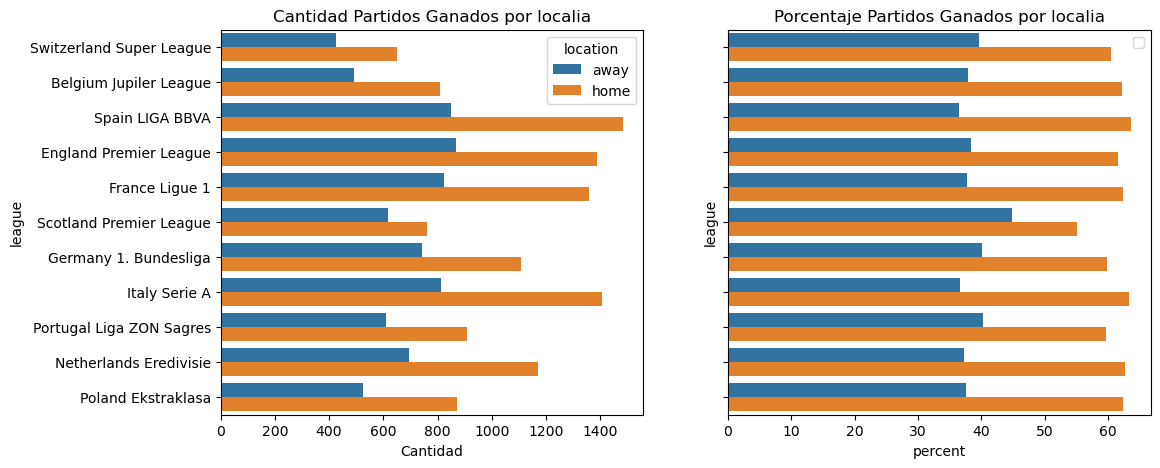

In [131]:
fig, ax = plt.subplots(1,2,figsize=(12,5),sharey=True)
sns.barplot(y='league',x='Cantidad',hue='location',
data = data_final_season_amp[data_final_season_amp['points']==3].groupby('league')['location'].value_counts().rename('Cantidad').reset_index().sort_values('location'),
ax=ax[0])
sns.barplot(y='league',x='percent',hue='location',
data = data_final_season_amp[data_final_season_amp['points']==3].groupby('league')['location'].value_counts(normalize=True).mul(100).rename('percent').reset_index().sort_values('location'),ax=ax[1])
ax[0].set_title('Cantidad Partidos Ganados por localia')
ax[1].set_title('Porcentaje Partidos Ganados por localia')
ax[1].legend([])
plt.show()

In [132]:
data_final_season_amp.head()

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum,points_acum,goals_acum,Id_rank_stage
25944,2016,2016-05-25 00:00:00,Switzerland Super League,FC Basel,0.0,-1,36,1992225,home,2016Switzerland Super LeagueFC Basel,83.0,50,2016Switzerland Super League36
25947,2016,2016-05-25 00:00:00,Switzerland Super League,BSC Young Boys,3.0,3,36,1992228,away,2016Switzerland Super LeagueBSC Young Boys,69.0,31,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Luzern,1.0,0,36,1992227,home,2016Switzerland Super LeagueFC Luzern,54.0,9,2016Switzerland Super League36
25944,2016,2016-05-25 00:00:00,Switzerland Super League,Grasshopper Club Zürich,3.0,1,36,1992225,away,2016Switzerland Super LeagueGrasshopper Club Z...,53.0,9,2016Switzerland Super League36
25946,2016,2016-05-25 00:00:00,Switzerland Super League,FC Sion,1.0,0,36,1992227,away,2016Switzerland Super LeagueFC Sion,50.0,3,2016Switzerland Super League36


In [133]:
df_win['year'] = df_win['year'].astype(np.int)
df_win['Id_points_acum'] = df_win['year'].astype('str') + df_win['league'] + df_win['team']
df_win

,year,league,team,points,goals,Id_points_acum
0,2016,Switzerland Super League,FC Basel,83.0,50.0,2016Switzerland Super LeagueFC Basel
10,2016,Spain LIGA BBVA,FC Barcelona,91.0,83.0,2016Spain LIGA BBVAFC Barcelona
30,2016,Scotland Premier League,Celtic,86.0,62.0,2016Scotland Premier LeagueCeltic
42,2016,Portugal Liga ZON Sagres,SL Benfica,88.0,66.0,2016Portugal Liga ZON SagresSL Benfica
60,2016,Poland Ekstraklasa,Legia Warszawa,60.0,30.0,2016Poland EkstraklasaLegia Warszawa
...,...,...,...,...,...,...
1382,2009,Italy Serie A,Inter,84.0,38.0,2009Italy Serie AInter
1402,2009,Germany 1. Bundesliga,VfL Wolfsburg,69.0,39.0,2009Germany 1. BundesligaVfL Wolfsburg
1420,2009,France Ligue 1,Girondins de Bordeaux,80.0,30.0,2009France Ligue 1Girondins de Bordeaux
1440,2009,England Premier League,Manchester United,90.0,44.0,2009England Premier LeagueManchester United


In [134]:
data_final_season_campeones = pd.merge(left=data_final_season_amp,right=df_win[['Id_points_acum']],on='Id_points_acum',how='left',indicator=True)
data_final_season_campeones.drop(['points_acum','goals_acum'],axis=1,inplace=True)
data_final_season_campeones.rename({'_merge':'Campeon'},axis=1,inplace=True)
data_final_season_campeones.replace({'both':1,'left_only':0},inplace=True)
data_final_season_campeones = data_final_season_campeones[data_final_season_campeones['Campeon']==1]
data_final_season_campeones.head()

,year,date,league,team,points,goals,stage,match_api_id,location,Id_points_acum,Id_rank_stage,Campeon
0,2016,2016-05-25 00:00:00,Switzerland Super League,FC Basel,0.0,-1,36,1992225,home,2016Switzerland Super LeagueFC Basel,2016Switzerland Super League36,1
10,2016,2016-05-22 00:00:00,Switzerland Super League,FC Basel,3.0,1,35,1992224,away,2016Switzerland Super LeagueFC Basel,2016Switzerland Super League35,1
20,2016,2016-05-16 00:00:00,Switzerland Super League,FC Basel,0.0,-4,34,1992218,away,2016Switzerland Super LeagueFC Basel,2016Switzerland Super League34,1
30,2016,2016-05-10 00:00:00,Switzerland Super League,FC Basel,1.0,0,33,1992211,home,2016Switzerland Super LeagueFC Basel,2016Switzerland Super League33,1
40,2016,2016-05-07 00:00:00,Switzerland Super League,FC Basel,3.0,1,32,1992210,away,2016Switzerland Super LeagueFC Basel,2016Switzerland Super League32,1


In [137]:
data_final_season_campeones['points'].replace({1:'Empate',3:'Victoria',0:'Derrota'}).value_counts(normalize=True)*100

Victoria    68.936717
Empate      19.113395
Derrota     11.949888
Name: points, dtype: float64

In [142]:
data_final_season_campeones.groupby('points')['location'].value_counts(normalize=True).mul(100).rename({0:'Derrota',1:'Empate',3:'Victoria'})

points    location
Derrota   away        71.236559
          home        28.763441
Empate    away        60.504202
          home        39.495798
Victoria  home        56.616962
          away        43.383038
Name: location, dtype: float64

In [151]:
pd.pivot_table(index='points',columns='location',values='match_api_id',data=data_final_season_campeones,aggfunc='count').rename({0:'Derrota',1:'Empate',3:'Victoria'}).div(len(data_final_season_campeones)).mul(100)

location,away,home
points,,
Derrota,8.512689,3.437199
Empate,11.564407,7.548988
Victoria,29.906842,39.029875
